<a href="https://colab.research.google.com/github/pbulkhak/StockAnalysis-/blob/master/Stock_Movement_Tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv1D, LSTM, Dense
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.losses import Huber
from keras.optimizers import SGD

Using TensorFlow backend.


In [2]:
!pip install yfinance --upgrade --no-cache-dir


  Created wheel for yfinance: filename=yfinance-0.1.45-cp36-none-any.whl size=14652 sha256=bb54e3e48ae2e0baf917580b2fd8dbe305e5f21693e653a40f2f119cbfc4043a
  Stored in directory: /tmp/pip-ephem-wheel-cache-530y939p/wheels/0c/d1/df/aa9a7744a4ac353cc9a1f2c3aaea7c1f457fc49de4286f2d88
Successfully built yfinance


In [3]:
## Save future files to your drive
## In this notebook control for multiple testing
import numpy as np
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
%cd "/content/drive/My Drive/Learning/Siraj/week2/hw2"


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Learning/Siraj/week2/hw2


In [4]:

from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
yf.pdr_override()
df_full = pdr.get_data_yahoo("ROKU", start="2018-01-01").reset_index()
df_full.to_csv('ROKU.csv',index=False)
df_full.head()


[*********************100%***********************]  1 of 1 downloaded


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,52.639999,52.849998,50.349998,52.070000,52.070000,4226700
1,2018-01-03,52.799999,57.416000,52.720001,55.439999,55.439999,9911800
2,2018-01-04,51.560001,52.775002,50.209999,51.240002,51.240002,9392600
3,2018-01-05,48.060001,48.990002,46.130001,46.279999,46.279999,13007900
4,2018-01-08,45.139999,48.360001,42.790001,47.470001,47.470001,12031400


In [0]:
df_full = pd.read_csv('ROKU.csv')

**Turtle Trading Agent**

In [6]:
df= df_full.copy()
name = 'Turtle Trading Agent'
count = int(np.ceil(len(df) * 0.1))
signals = pd.DataFrame(index=df.index)
signals['signal'] = 0.0
signals['trend'] = df['Close']
signals['RollingMax'] = (signals.trend.shift(1).rolling(count).max())
signals['RollingMin'] = (signals.trend.shift(1).rolling(count).min())
signals.loc[signals['RollingMax'] < signals.trend, 'signal'] = -1
signals.loc[signals['RollingMin'] > signals.trend, 'signal'] = 1
signals

,signal,trend,RollingMax,RollingMin
0,0.0,52.070000,NaN,NaN
1,0.0,55.439999,NaN,NaN
2,0.0,51.240002,NaN,NaN
3,0.0,46.279999,NaN,NaN
4,0.0,47.470001,NaN,NaN
5,0.0,44.730000,NaN,NaN
6,0.0,44.709999,NaN,NaN
7,0.0,43.869999,NaN,NaN
8,0.0,43.380001,NaN,NaN
9,0.0,39.189999,NaN,NaN


In [0]:
def buy_stock(
    real_movement,
    signal,
    initial_money = 10000,
    max_buy = 1,
    max_sell = 1,
):
    """
    real_movement = actual movement in the real world
    delay = how much interval you want to delay to change our decision from buy to sell, vice versa
    initial_state = 1 is buy, 0 is sell
    initial_money = 1000, ignore what kind of currency
    max_buy = max quantity for share to buy
    max_sell = max quantity for share to sell
    """
    starting_money = initial_money
    states_sell = []
    states_buy = []
    current_inventory = 0

    def buy(i, initial_money, current_inventory):
        shares = initial_money // real_movement[i]
        if shares < 1:
            print(
                'day %d: total balances %f, not enough money to buy a unit price %f'
                % (i, initial_money, real_movement[i])
            )
        else:
            if shares > max_buy:
                buy_units = max_buy
            else:
                buy_units = shares
            initial_money -= buy_units * real_movement[i]
            current_inventory += buy_units
            print(
                'day %d: buy %d units at price %f, total balance %f'
                % (i, buy_units, buy_units * real_movement[i], initial_money)
            )
            states_buy.append(0)
        return initial_money, current_inventory

    for i in range(real_movement.shape[0] - int(0.025 * len(df))):
        state = signal[i]
        if state == 1:
            initial_money, current_inventory = buy(
                i, initial_money, current_inventory
            )
            states_buy.append(i)
        elif state == -1:
            if current_inventory == 0:
                    print('day %d: cannot sell anything, inventory 0' % (i))
            else:
                if current_inventory > max_sell:
                    sell_units = max_sell
                else:
                    sell_units = current_inventory
                current_inventory -= sell_units
                total_sell = sell_units * real_movement[i]
                initial_money += total_sell
                try:
                    invest = (
                        (real_movement[i] - real_movement[states_buy[-1]])
                        / real_movement[states_buy[-1]]
                    ) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell %d units at price %f, investment %f %%, total balance %f,'
                    % (i, sell_units, total_sell, invest, initial_money)
                )
            states_sell.append(i)
            
    invest = ((initial_money - starting_money) / starting_money) * 100
    total_gains = initial_money - starting_money
    return states_buy, states_sell, total_gains, invest

In [9]:
states_buy, states_sell, total_gains, invest = buy_stock(df.Close, signals['signal'])

day 48: buy 1 units at price 37.369999, total balance 9962.630001
day 49: buy 1 units at price 36.930000, total balance 9925.700001
day 50: buy 1 units at price 36.270000, total balance 9889.430001
day 51: buy 1 units at price 35.860001, total balance 9853.570000
day 52: buy 1 units at price 33.849998, total balance 9819.720002
day 55: buy 1 units at price 33.509998, total balance 9786.210004
day 56: buy 1 units at price 32.060001, total balance 9754.150003
day 59: buy 1 units at price 31.299999, total balance 9722.850004
day 60: buy 1 units at price 31.100000, total balance 9691.750004
day 61: buy 1 units at price 30.330000, total balance 9661.420004
day 62: buy 1 units at price 30.290001, total balance 9631.130003
day 100, sell 1 units at price 38.540001, investment 27.236711 %, total balance 9669.670004,
day 101, sell 1 units at price 38.599998, investment 27.434786 %, total balance 9708.270002,
day 106, sell 1 units at price 40.259998, investment 32.915143 %, total balance 9748.530

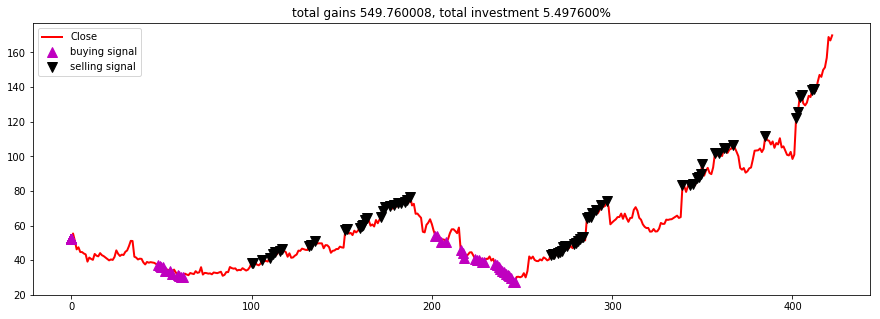

In [11]:
close = df['Close']
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
plt.savefig('ROKU.png')
plt.show()


**Moving Average Agent**

In [12]:
df= df_full.copy()
name = 'Moving Average agent'

short_window = int(0.025 * len(df))
long_window = int(0.05 * len(df))

signals = pd.DataFrame(index=df.index)
signals['signal'] = 0.0

signals['short_ma'] = df['Close'].rolling(window=short_window, min_periods=1, center=False).mean()
signals['long_ma'] = df['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

signals['signal'][short_window:] = np.where(signals['short_ma'][short_window:] 
                                            > signals['long_ma'][short_window:], 1.0, 0.0)   
signals['positions'] = signals['signal'].diff()

signals

,signal,short_ma,long_ma,positions
0,0.0,52.070000,52.070000,NaN
1,0.0,53.754999,53.754999,0.0
2,0.0,52.916667,52.916667,0.0
3,0.0,51.257500,51.257500,0.0
4,0.0,50.500000,50.500000,0.0
5,0.0,49.538334,49.538334,0.0
6,0.0,48.848571,48.848571,0.0
7,0.0,48.226250,48.226250,0.0
8,0.0,47.687778,47.687778,0.0
9,0.0,46.838000,46.838000,0.0


In [0]:
def buy_stock(
    real_movement,
    signal,
    initial_money = 10000,
    max_buy = 1,
    max_sell = 1,
):
    """
    real_movement = actual movement in the real world
    delay = how much interval you want to delay to change our decision from buy to sell, vice versa
    initial_state = 1 is buy, 0 is sell
    initial_money = 1000, ignore what kind of currency
    max_buy = max quantity for share to buy
    max_sell = max quantity for share to sell
    """
    starting_money = initial_money
    states_sell = []
    states_buy = []
    current_inventory = 0

    def buy(i, initial_money, current_inventory):
        shares = initial_money // real_movement[i]
        if shares < 1:
            print(
                'day %d: total balances %f, not enough money to buy a unit price %f'
                % (i, initial_money, real_movement[i])
            )
        else:
            if shares > max_buy:
                buy_units = max_buy
            else:
                buy_units = shares
            initial_money -= buy_units * real_movement[i]
            current_inventory += buy_units
            print(
                'day %d: buy %d units at price %f, total balance %f'
                % (i, buy_units, buy_units * real_movement[i], initial_money)
            )
            states_buy.append(0)
        return initial_money, current_inventory

    for i in range(real_movement.shape[0] - int(0.025 * len(df))):
        state = signal[i]
        if state == 1:
            initial_money, current_inventory = buy(
                i, initial_money, current_inventory
            )
            states_buy.append(i)
        elif state == -1:
            if current_inventory == 0:
                    print('day %d: cannot sell anything, inventory 0' % (i))
            else:
                if current_inventory > max_sell:
                    sell_units = max_sell
                else:
                    sell_units = current_inventory
                current_inventory -= sell_units
                total_sell = sell_units * real_movement[i]
                initial_money += total_sell
                try:
                    invest = (
                        (real_movement[i] - real_movement[states_buy[-1]])
                        / real_movement[states_buy[-1]]
                    ) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell %d units at price %f, investment %f %%, total balance %f,'
                    % (i, sell_units, total_sell, invest, initial_money)
                )
            states_sell.append(i)
    invest = ((initial_money - starting_money) / starting_money) * 100
    total_gains = initial_money - starting_money
    return states_buy, states_sell, total_gains, invest

In [14]:
states_buy, states_sell, total_gains, invest = buy_stock(df.Close, signals['positions'])

day 29: buy 1 units at price 43.020000, total balance 9956.980000
day 42, sell 1 units at price 39.000000, investment -9.344491 %, total balance 9995.980000,
day 72: buy 1 units at price 35.980000, total balance 9960.000000
day 82, sell 1 units at price 32.970001, investment -8.365756 %, total balance 9992.970001,
day 88: buy 1 units at price 36.080002, total balance 9956.889999
day 147, sell 1 units at price 46.459999, investment 28.769391 %, total balance 10003.349998,
day 154: buy 1 units at price 55.380001, total balance 9947.969997
day 194, sell 1 units at price 64.500000, investment 16.468037 %, total balance 10012.469997,
day 256: buy 1 units at price 42.099998, total balance 9970.369999
day 306, sell 1 units at price 63.910000, investment 51.805233 %, total balance 10034.279999,
day 318: buy 1 units at price 59.320000, total balance 9974.959999
day 320, sell 1 units at price 58.650002, investment -1.129464 %, total balance 10033.610001,
day 334: buy 1 units at price 64.389999, 

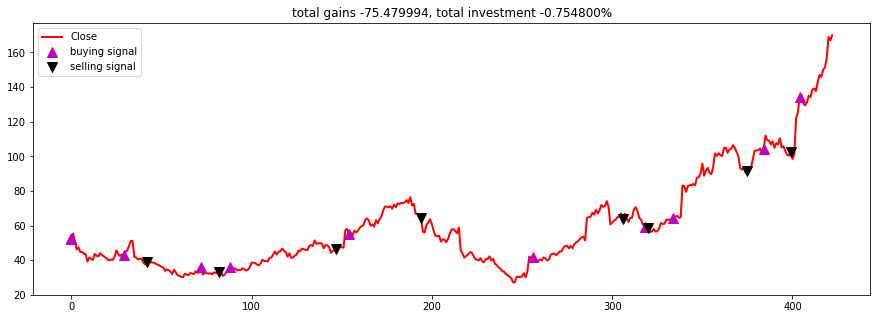

In [15]:
close = df['Close']
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
plt.savefig('ROKU-MovingAverageAgent.png')
plt.show()

**Signal Rolling agent**

In [0]:
df= df_full.copy()
name = 'Signal Rolling agent'

In [0]:
def buy_stock(
    real_movement,
    delay = 5,
    initial_state = 1,
    initial_money = 10000,
    max_buy = 1,
    max_sell = 1,
):
    """
    real_movement = actual movement in the real world
    delay = how much interval you want to delay to change our decision from buy to sell, vice versa
    initial_state = 1 is buy, 0 is sell
    initial_money = 1000, ignore what kind of currency
    max_buy = max quantity for share to buy
    max_sell = max quantity for share to sell
    """
    starting_money = initial_money
    delay_change_decision = delay
    current_decision = 0
    state = initial_state
    current_val = real_movement[0]
    states_sell = []
    states_buy = []
    current_inventory = 0

    def buy(i, initial_money, current_inventory):
        shares = initial_money // real_movement[i]
        if shares < 1:
            print(
                'day %d: total balances %f, not enough money to buy a unit price %f'
                % (i, initial_money, real_movement[i])
            )
        else:
            if shares > max_buy:
                buy_units = max_buy
            else:
                buy_units = shares
            initial_money -= buy_units * real_movement[i]
            current_inventory += buy_units
            print(
                'day %d: buy %d units at price %f, total balance %f'
                % (i, buy_units, buy_units * real_movement[i], initial_money)
            )
            states_buy.append(0)
        return initial_money, current_inventory

    if state == 1:
        initial_money, current_inventory = buy(
            0, initial_money, current_inventory
        )

    for i in range(1, real_movement.shape[0], 1):
        if real_movement[i] < current_val and state == 0:
            if current_decision < delay_change_decision:
                current_decision += 1
            else:
                state = 1
                initial_money, current_inventory = buy(
                    i, initial_money, current_inventory
                )
                current_decision = 0
                states_buy.append(i)
        if real_movement[i] > current_val and state == 1:
            if current_decision < delay_change_decision:
                current_decision += 1
            else:
                state = 0

                if current_inventory == 0:
                    print('day %d: cannot sell anything, inventory 0' % (i))
                else:
                    if current_inventory > max_sell:
                        sell_units = max_sell
                    else:
                        sell_units = current_inventory
                    current_inventory -= sell_units
                    total_sell = sell_units * real_movement[i]
                    initial_money += total_sell
                    try:
                        invest = (
                            (real_movement[i] - real_movement[states_buy[-1]])
                            / real_movement[states_buy[-1]]
                        ) * 100
                    except:
                        invest = 0
                    print(
                        'day %d, sell %d units at price %f, investment %f %%, total balance %f,'
                        % (i, sell_units, total_sell, invest, initial_money)
                    )

                current_decision = 0
                states_sell.append(i)
        current_val = real_movement[i]
    invest = ((initial_money - starting_money) / starting_money) * 100
    total_gains = initial_money - starting_money
    return states_buy, states_sell, total_gains, invest

In [18]:
states_buy, states_sell, total_gains, invest = buy_stock(df.Close, initial_state = 1, 
                                                         delay = 4, initial_money = 10000)

day 0: buy 1 units at price 52.070000, total balance 9947.930000
day 16, sell 1 units at price 44.099998, investment -15.306322 %, total balance 9992.029998,
day 21: buy 1 units at price 39.919998, total balance 9952.110000
day 30, sell 1 units at price 44.849998, investment 12.349700 %, total balance 9996.959998,
day 39: buy 1 units at price 40.770000, total balance 9956.189998
day 63, sell 1 units at price 32.270000, investment -20.848663 %, total balance 9988.459998,
day 70: buy 1 units at price 32.689999, total balance 9955.769999
day 79, sell 1 units at price 32.910000, investment 0.672992 %, total balance 9988.679999,
day 89: buy 1 units at price 35.459999, total balance 9953.220000
day 99, sell 1 units at price 35.990002, investment 1.494650 %, total balance 9989.210002,
day 109: buy 1 units at price 39.240002, total balance 9949.970000
day 116, sell 1 units at price 45.270000, investment 15.366967 %, total balance 9995.240000,
day 127: buy 1 units at price 45.410000, total bala

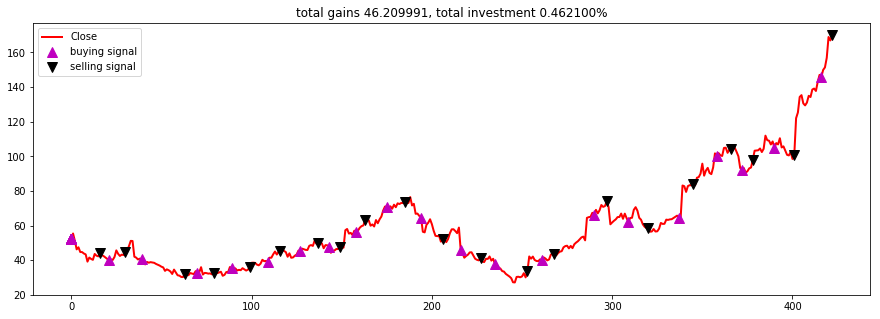

In [19]:
close = df['Close']
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
plt.savefig('ROKU-SignalRollingAgent.png')
plt.show()